In [2]:
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd


from data.get_data import get_district_coordinates, get_district, get_neighborhood

from streamlit_folium import folium_static
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
year = 2017

df = pd.DataFrame(get_neighborhood(year))


In [4]:
df.head()

,Year,District,Neighborhood,Gender,Number
0,2017,"{'Code': '1', 'Name': 'Ciutat Vella'}","{'Code': '1', 'Name': 'el Raval'}",Male,224
1,2017,"{'Code': '1', 'Name': 'Ciutat Vella'}","{'Code': '2', 'Name': 'el Barri Gòtic'}",Male,50
2,2017,"{'Code': '1', 'Name': 'Ciutat Vella'}","{'Code': '3', 'Name': 'la Barceloneta'}",Male,43
3,2017,"{'Code': '1', 'Name': 'Ciutat Vella'}","{'Code': '4', 'Name': 'Sant Pere, Santa Cateri...",Male,95
4,2017,"{'Code': '2', 'Name': 'Eixample'}","{'Code': '5', 'Name': 'el Fort Pienc'}",Male,124


In [7]:
def df_format_fixer(df):
    distritos = []
    barrios = []
    poblacion = []
    Gender = []
    columns = ["District","Neighborhood","Population","Gender"]
    for i in df["Number"]:
        poblacion.append(int(i))
    for i in df["District"]: 
        distritos.append(i["Name"])
    for i in df[str("Neighborhood")]: 
        barrios.append(i["Name"])
    for i in df["Gender"]: 
        Gender.append(i)
    df_fixed = pd.DataFrame(list(zip(distritos,barrios,poblacion,Gender)),columns=columns)
    return df_fixed



In [8]:
df2 = df_format_fixer(df)

In [9]:
df2

,District,Neighborhood,Population,Gender
0,Ciutat Vella,el Raval,224,Male
1,Ciutat Vella,el Barri Gòtic,50,Male
2,Ciutat Vella,la Barceloneta,43,Male
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",95,Male
4,Eixample,el Fort Pienc,124,Male
...,...,...,...,...
13208,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,11,Female
13209,Sant Martí,el Besòs i el Maresme,41,Female
13210,Sant Martí,Provençals del Poblenou,28,Female
13211,Sant Martí,Sant Martí de Provençals,57,Female


In [48]:
df3= df2[df2['District']=="Sant Martí"]


In [45]:
list(df3["Neighborhood"].unique())

["el Camp de l'Arpa del Clot",
 'el Clot',
 'el Parc i la Llacuna del Poblenou',
 'la Vila Olímpica del Poblenou',
 'el Poblenou',
 'Diagonal Mar i el Front Marítim del Poblenou',
 'el Besòs i el Maresme',
 'Provençals del Poblenou',
 'Sant Martí de Provençals',
 'la Verneda i la Pau']

In [37]:
def bar_plot(df,a): #Nota: esta funcion no la he probado, la cree en el avion.
    plt.figure(figsize=(20,6))
    fig, ax = plt.subplots()
    sns.barplot(data=df, x=a,y = 'Population',) # tambien se puede estratificar por genero hue="Gender"
    plt.xticks(rotation=70)
    plt.ylabel('Population')
    return fig

In [42]:
df4=df3.groupby("Neighborhood").sum().reset_index().sort_values('Population',ascending=False)


/tmp/ipykernel_3226/1227301031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4=df3.groupby("Neighborhood").sum().reset_index().sort_values('Population',ascending=False)


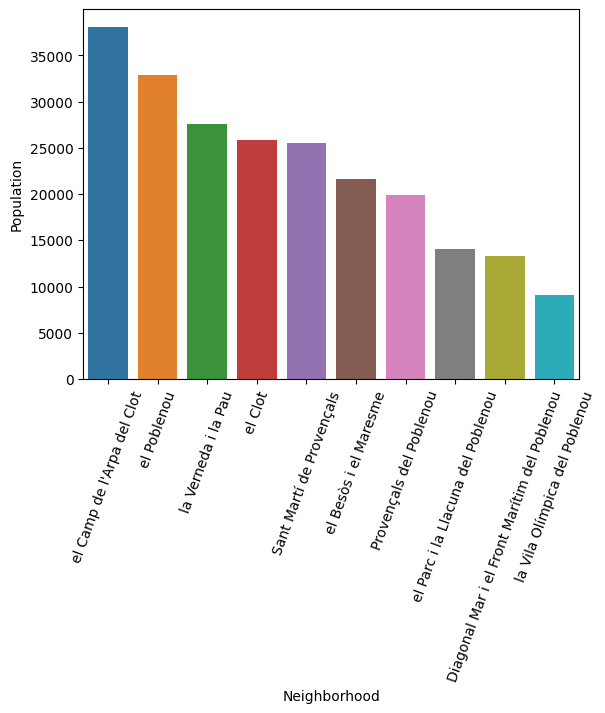

<Figure size 2000x600 with 0 Axes>

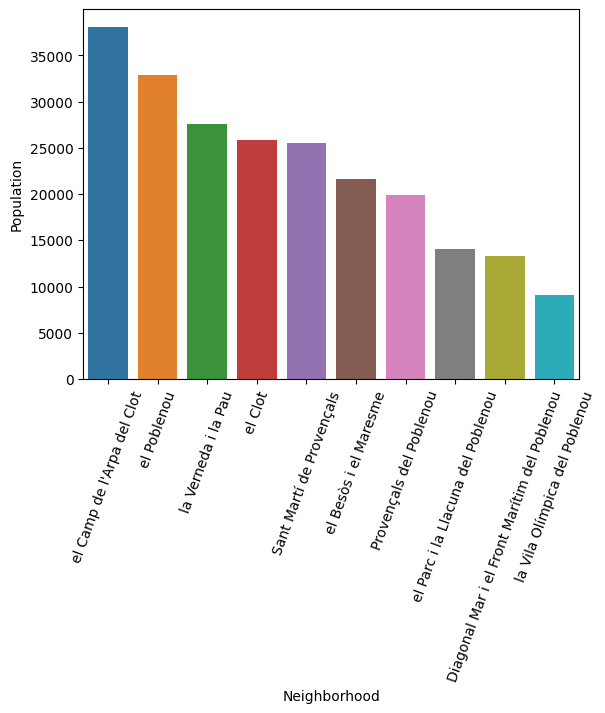

In [43]:
bar_plot(df4,a="Neighborhood")

In [18]:
#distritos[:10]
poblacion[:10]

NameError: name 'poblacion' is not defined

In [21]:
df2 = pd.DataFrame(list(zip(distritos,poblacion,Gender)),columns=columns)
df2

NameError: name 'distritos' is not defined

In [22]:
df2 = df_format_fixer(df)

In [35]:
df3 = df2.groupby("District").sum().reset_index()

In [36]:
df3

,District,Population
0,Ciutat Vella,98232
1,Eixample,258152
2,Gràcia,117227
3,Horta-Guinardó,161921
4,Les Corts,79888
5,Nou Barris,159214
6,Sant Andreu,143246
7,Sant Martí,227989
8,Sants-Montjuïc,174478
9,Sarrià-Sant Gervasi,143967


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ciutat Vella'),
  Text(1, 0, 'Eixample'),
  Text(2, 0, 'Gràcia'),
  Text(3, 0, 'Horta-Guinardó'),
  Text(4, 0, 'Les Corts'),
  Text(5, 0, 'Nou Barris'),
  Text(6, 0, 'Sant Andreu'),
  Text(7, 0, 'Sant Martí'),
  Text(8, 0, 'Sants-Montjuïc'),
  Text(9, 0, 'Sarrià-Sant Gervasi')])

<Figure size 1500x600 with 0 Axes>

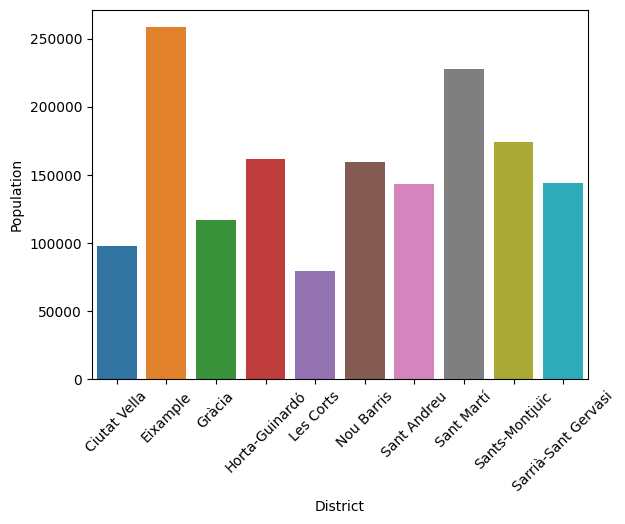

In [38]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots()
sns.barplot(data=df3, x='District',y='Population')
plt.xticks(rotation=45)
    

In [16]:
"""coordinates_dict =[
        {"Name":"Ciutat Vella","coordinates": [41.38022, 2.17319]},
        {"Name":"Sants-Montjuïc","coordinates": [41.37263, 2.1546]},
        {"Name":"Eixample","coordinates": [41.38896, 2.16179]},
        {"Name":"Les Corts","coordinates": [41.38845,2.12171]},
        {"Name":"Sarrià-Sant Gervasi","coordinates": [41.40237, 2.15641]},
        {"Name":"Gràcia","coordinates": [41.40237, 2.15641]},
        {"Name":"Horta-Guinardó","coordinates": [41.41849, 2.1677]},
        {"Name":"Nou Barris","coordinates": [41.44163, 2.17727]},
        {"Name":"Sant Andreu","coordinates": [41.43541, 2.18982]},
        {"Name":"Sant Martí","coordinates": [41.41814, 2.19933]}
        ]"""
coordinates_dict =[
        {"Name":"Ciutat Vella","latitude":41.38022, "Longitude":2.17319},
        {"Name":"Sants-Montjuïc","latitude":41.37263, "Longitude":2.1546},
        {"Name":"Eixample","latitude":41.38896, "Longitude":2.16179},
        {"Name":"Les Corts","latitude":41.38845, "Longitude":2.12171},
        {"Name":"Sarrià-Sant Gervasi","latitude":41.40237, "Longitude":2.15641},
        {"Name":"Gràcia","latitude":41.40237, "Longitude": 2.15641},
        {"Name":"Horta-Guinardó","latitude":41.41849,"Longitude": 2.1677},
        {"Name":"Nou Barris","latitude":41.44163, "Longitude":2.17727},
        {"Name":"Sant Andreu","latitude":41.43541,"Longitude": 2.18982},
        {"Name":"Sant Martí","latitude":41.41814,"Longitude": 2.19933}
        ]



In [15]:
coordinates_district = get_district_coordinates()

In [17]:
def get_coordenates(list):
    res = []
    for i in list:
        res.append({"Name":i["Name"],"coordinates": [i["latitude"], i["Longitude"]]})
    return res




In [18]:
get_coordenates(coordinates_dict)

[{'Name': 'Ciutat Vella', 'coordinates': [41.38022, 2.17319]},
 {'Name': 'Sants-Montjuïc', 'coordinates': [41.37263, 2.1546]},
 {'Name': 'Eixample', 'coordinates': [41.38896, 2.16179]},
 {'Name': 'Les Corts', 'coordinates': [41.38845, 2.12171]},
 {'Name': 'Sarrià-Sant Gervasi', 'coordinates': [41.40237, 2.15641]},
 {'Name': 'Gràcia', 'coordinates': [41.40237, 2.15641]},
 {'Name': 'Horta-Guinardó', 'coordinates': [41.41849, 2.1677]},
 {'Name': 'Nou Barris', 'coordinates': [41.44163, 2.17727]},
 {'Name': 'Sant Andreu', 'coordinates': [41.43541, 2.18982]},
 {'Name': 'Sant Martí', 'coordinates': [41.41814, 2.19933]}]

In [ ]:
[
{"Name": 'el Raval', "latitude":41.37951, "Longitude": 2.16836},
{"Name": 'el Barri Gòtic', "latitude": 	41.38339,"Longitude": 2.17691},
{"Name": 'la Barceloneta', "latitude": 	41.3806533, "Longitude": 2.1899274},
{"Name": 'Sant Pere, Santa Caterina i la Ribera', "latitude": 41.3883219, "Longitude": 2.1774107},
{"Name": 'el Fort Pienc', "latitude": 41.3959246, "Longitude": 2.1823245},
{"Name": 'la Sagrada Família', "latitude": 41.4034789, "Longitude": 2.174410},
{"Name": "la Dreta de l'Eixample", "latitude": 41.3950373, "Longitude": 2.1672069},
{"Name": "l'Antiga Esquerra de l'Eixample", "latitude": 41.39, "Longitude":2.155},
{"Name": "la Nova Esquerra de l'Eixample", "latitude": 0, "Longitude": 0},
{"Name": 'Sant Antoni', "latitude": 41.3800525, "Longitude": 2.1633268},
{"Name": 'el Poble Sec', "latitude": 41.3749795, "Longitude": 2.1605721},
{"Name": 'la Marina del Prat Vermell', "latitude": 41.3538419, "Longitude": 2.1423184},
{"Name": 'la Marina de Port', 'latitude': 41.3602964, "Longitude": 2.1375842},
{"Name": 'la Font de la Guatlla', "latitude": 	41.3707824, "Longitude": 2.1446756},
{"Name": 'Hostafrancs', "latitude": 41.3752539, "Longitude": 2.1433476},
{"Name": 'la Bordeta', "latitude": 	41.3691417, "Longitude": 2.1373733},
{"Name": 'Sants - Badal', "latitude": 41.375466, "Longitude": 2.1277096},
{"Name": 'Sants', "latitude": 41.3753288, "Longitude": 2.1349117},
{"Name": 'les Corts', "latitude": 41.3884524, "Longitude": 	2.12171825426451},
{"Name": 'la Maternitat i Sant Ramon', "latitude": 41.38197505, "Longitude": 2.11547363754403},
{"Name": 'Pedralbes', "latitude": 41.3901401, "Longitude": 2.112218},
{"Name": 'Vallvidrera, el Tibidabo i les Planes', "latitude": 41.4150674, "Longitude":2.1074824 },
{"Name": 'Sarrià', "latitude": 41.399373, "Longitude": 2.1215125},
{"Name": 'les Tres Torres', "latitude": 41.3976108, "Longitude": 2.1311837},
{"Name": 'Sant Gervasi - la Bonanova', "latitude": 	41.4059829, "Longitude": 2.1334046},
{"Name": 'Sant Gervasi - Galvany', "latitude": 41.39780685, "Longitude": 2.14338538868091},
{"Name": 'el Putxet i el Farró', "latitude": 41.40731705, "Longitude": 2.14342428382936},
{"Name": 'Vallcarca i els Penitents', "latitude": 41.41571215, "Longitude": 2.14146925844434},
{"Name": 'la Salut', "latitude": 	41.4428167, "Longitude": 2.2246942},
{"Name": 'la Vila de Gràcia', "latitude": 	41.4031783, "Longitude": 2.1571662},
{"Name": "el Camp d'en Grassot i Gràcia Nova", "latitude": 41.4045889, "Longitude": 2.1667806},
{"Name": 'el Baix Guinardó', "latitude": 41.4114374, "Longitude": 2.1686512},
{"Name": 'Can Baró', "latitude": 41.4160925, "Longitude": 2.1624018},
{"Name": 'el Guinardó', "latitude": 41.4177335, "Longitude": 2.1736316},
{"Name": "la Font d'en Fargues", "latitude": 41.425788, "Longitude": 2.1659152},
{"Name": 'el Carmel', "latitude": 41.4256037, "Longitude": 2.1549579},
{"Name": 'la Teixonera', "latitude": 41.423173, "Longitude": 2.1459698},
{"Name": 'Sant Genís dels Agudells', "latitude": 41.4264567, "Longitude": 2.1374905},
{"Name": 'Montbau', "latitude": 41.4295504, "Longitude": 2.1445379},
{"Name": "la Vall d'Hebron", "latitude": 41.4303788, "Longitude": 2.1486244},
{"Name": 'la Clota', "latitude": 41.4278574, "Longitude":2.1524066 },
{"Name": 'Horta', "latitude": 41.4296898, "Longitude": 2.1603155},
{"Name": 'Vilapicina i la Torre Llobeta', "latitude": 41.4300186, "Longitude": 2.1760694},
{"Name": 'Porta', "latitude": 41.4331882, "Longitude": 2.1760336},
{"Name": 'el Turó de la Peira',"latitude": 41.4323672, "Longitude": 2.1690681},
{"Name": 'Can Peguera', "latitude": 41.4348568, "Longitude":2.1657848 },
{"Name": 'la Guineueta', "latitude": 41.4403026, "Longitude": 2.1704023},
{"Name": 'Canyelles', "latitude": 41.2858273, "Longitude": 1.7222743},
{"Name": 'les Roquetes', "latitude": 41.4477984, "Longitude": 2.1762713},
{"Name": 'Verdun', "latitude": 	41.4440404, "Longitude": 2.1758401},
{"Name": 'la Prosperitat', "latitude": 41.4423335, "Longitude": 2.1794381},
{"Name": 'la Trinitat Nova', "latitude": 41.4494828, "Longitude": 2.1841624},
{"Name": 'Torre Baró', "latitude": 41.4580108, "Longitude": 2.1839863},
{"Name": 'Ciutat Meridiana', "latitude": 41.4609185, "Longitude": 2.1745668},
{"Name": 'Vallbona', "latitude": 41.4624415, "Longitude": 2.1749221},
{"Name": 'la Trinitat Vella', "latitude": 41.4491496, "Longitude": 2.1933756},
{"Name": 'Baró de Viver', "latitude": 41.4499467, "Longitude": 2.1995389},
{"Name": 'el Bon Pastor', "latitude": 41.4361096, "Longitude": 2.2048066},
{"Name": 'Sant Andreu', "latitude": 41.43743905, "Longitude": 2.19685944974823},
{"Name": 'la Sagrera', "latitude": 41.4237499, "Longitude": 2.189582},
{"Name": 'el Congrés i els Indians', "latitude": 41.423784, "Longitude": 2.18082161203875},
{"Name": 'Navas', "latitude": 41.416185, "Longitude": 2.1849284},
{"Name": "el Camp de l'Arpa del Clot", "latitude": 	41.4107542, "Longitude": 2.1828156},
{"Name": 'el Clot', "latitude": 41.4101394, "Longitude": 2.1869158},
{"Name": 'el Parc i la Llacuna del Poblenou', "latitude": 41.4007334, "Longitude": 2.191342},
{"Name": 'la Vila Olímpica del Poblenou', "latitude": 41.3898682, "Longitude": 2.1968459},
{"Name": 'el Poblenou', "latitude": 41.400527, "Longitude": 2.2017292},
{"Name": 'Diagonal Mar i el Front Marítim del Poblenou', "latitude": 41.4052285, "Longitude": 2.2133522},
{"Name": 'el Besòs i el Maresme', "latitude": 41.4149787, "Longitude": 2.2138765},
{"Name": 'Provençals del Poblenou', "latitude": 41.4119484, "Longitude": 2.2041249},
{"Name": 'Sant Martí de Provençals', "latitude": 41.4165186, "Longitude": 2.1989683},
{"Name": 'la Verneda i la Pau', "latitude": 41.4232198, "Longitude": 2.20294015204582}

]